Importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xb
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


 Reading input csv files

In [2]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

* Shape of the dataset
* Description
* Columns 
* Dataypes of columns

In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data Preprocessing

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Plotting out the distribution of Age.

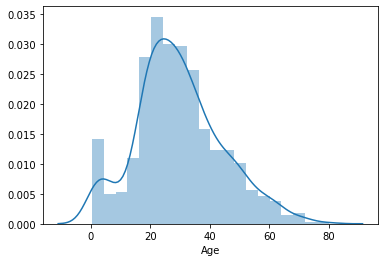

In [9]:
sns.distplot(train_data['Age'],kde=True)

In [10]:
train_data['Age'] = train_data['Age'].fillna(30)

Out of 871 entries, 677 entries of Cabin are null. Hence it is better to drop that column.

In [11]:
train_data = train_data.drop(['Cabin'],axis=1)
test_data = test_data.drop(['Cabin'],axis=1)

Embarked is a categorical feature which has only 2 null values. Hence the null values will be filled by calculating the mode.

In [12]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train_data['Embarked']=train_data['Embarked'].fillna('S')

Converting categorical features Embarked and Sex into numerical and float variable Fare into int 

In [14]:
train_data['Sex'] = pd.get_dummies(train_data['Sex'])
test_data['Sex'] = pd.get_dummies(test_data['Sex'])
train_data['Fare']=train_data['Fare'].astype('int32')
train_data['Embarked'] = pd.factorize(train_data['Embarked'])[0]
test_data['Embarked'] = pd.factorize(test_data['Embarked'])[0]
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())
test_data['Fare']=test_data['Fare'].astype('int32')

Plotting graphs to get insights  

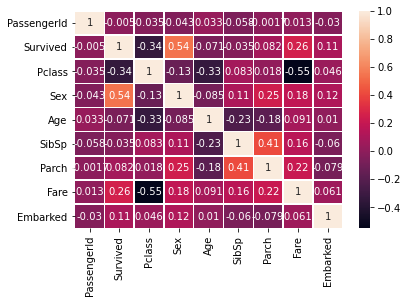

In [15]:
sns.heatmap(train_data.corr(),annot=True,linewidths=0.5)

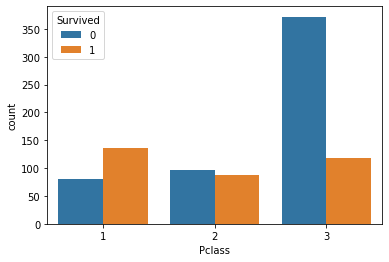

In [16]:
sns.countplot(x=train_data['Pclass'],hue=train_data['Survived'])

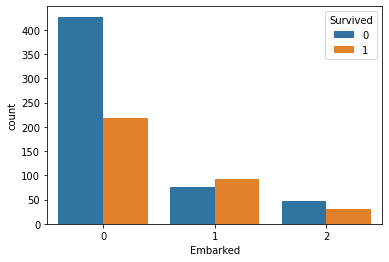

In [17]:
sns.countplot(x=train_data['Embarked'],hue=train_data['Survived'])

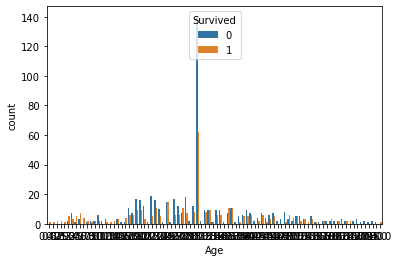

In [18]:
sns.countplot(x=train_data['Age'],hue=train_data['Survived'])

Converting Age into 5 groups as follows

In [19]:
for i in range(0,len(train_data)):
    if train_data['Age'][i] <= 15:
        train_data['Age'][i] = 0
    elif (train_data['Age'][i] > 15) & (train_data['Age'][i] <=35):
        train_data['Age'][i]=1
    elif (train_data['Age'][i] > 35) & (train_data['Age'][i] <=55):
        train_data['Age'][i]=2
    elif (train_data['Age'][i] > 55) & (train_data['Age'][i] <=75):
        train_data['Age'][i]=3
    else:
        train_data['Age'][i]=4

In [20]:
for i in range(0,len(test_data)):
    if test_data['Age'][i] <= 15:
        test_data['Age'][i] = 0
    elif (test_data['Age'][i] > 15) & (test_data['Age'][i] <=26):
        test_data['Age'][i]=1
    elif (test_data['Age'][i] > 35) & (test_data['Age'][i] <=55):
        test_data['Age'][i]=2
    elif (test_data['Age'][i] > 55) & (test_data['Age'][i] <=75):
        test_data['Age'][i]=3
    else:
        test_data['Age'][i]=4

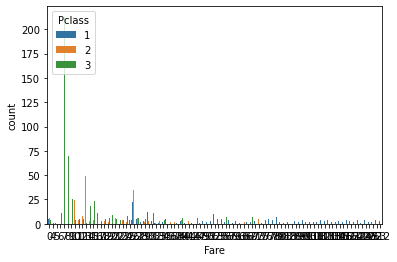

In [21]:
sns.countplot(x=train_data['Fare'],hue=train_data['Pclass'])

Converting Fare into 3 groups based on above visualization 

In [22]:
for i in range(0,len(train_data)):
    if train_data['Fare'][i] <= 50:
        train_data['Fare'][i] = 3
    elif (train_data['Fare'][i] > 50) & (train_data['Fare'][i] <=150 ):
        train_data['Fare'][i]=2
    else:
        train_data['Fare'][i]=1

In [23]:
for i in range(0,len(test_data)):
    if test_data['Fare'][i] <= 50:
        test_data['Fare'][i] = 3
    elif (test_data['Fare'][i] > 50) & (test_data['Fare'][i] <=150 ):
        test_data['Fare'][i]=2
    else:
        test_data['Fare'][i]=1

Combining SibSp and Parch into a single feature Fam

In [24]:
train_data['Fam'] = train_data['Parch'] + train_data['SibSp']
test_data['Fam'] = test_data['Parch'] + test_data['SibSp']

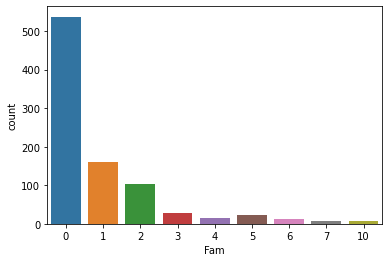

In [25]:
sns.countplot(train_data['Fam'])

Dividing Fam into 5 groups as follows

In [26]:
for i in range(0,len(train_data)):
    if train_data['Fam'][i] == 0:
        train_data['Fam'][i] = 0
    elif (train_data['Fam'][i] >= 1) & (train_data['Fam'][i] <=3):
        train_data['Fam'][i]=1
    elif (train_data['Fam'][i] >= 4) & (train_data['Fam'][i] <=6):
        train_data['Fam'][i]=2
    elif (train_data['Fam'][i] >= 7) & (train_data['Fam'][i] <=9):
        train_data['Fam'][i]=3
    else:
        train_data['Fam'][i]=4

In [27]:
for i in range(0,len(test_data)):
    if test_data['Fam'][i] == 0:
        test_data['Fam'][i] = 0
    elif (test_data['Fam'][i] >= 1) & (test_data['Fam'][i] <=3):
        test_data['Fam'][i]=1
    elif (test_data['Fam'][i] >= 4) & (test_data['Fam'][i] <=6):
        test_data['Fam'][i]=2
    elif (test_data['Fam'][i] >= 7) & (test_data['Fam'][i] <=9):
        test_data['Fam'][i]=3
    else:
        test_data['Fam'][i]=4

Selecting X and Y and splitting the dataset

In [28]:
X = train_data[['Sex','Pclass','Age','Parch','Fam','Fare','Embarked']]
y = train_data[['Survived']]
X_test = test_data[['Sex','Pclass','Age','Parch','Fam','Fare','Embarked']]
train_X , test_X , train_y , test_y = train_test_split(X,y,test_size = 0.2,random_state=0)

Training on different models

In [29]:
classifier = RandomForestClassifier(n_estimators=500,max_depth=3)
classifier.fit(train_X,train_y)
classifier.score(test_X,test_y)

0.8212290502793296

In [30]:
xgb_model = xb.XGBClassifier(base_score=0.5,n_estimators=1000, learning_rate=0.05)
xgb_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)
xgb_model.score(test_X,test_y)

0.8268156424581006

In [31]:
log_reg = LogisticRegression()
log_reg.fit(train_X,train_y)
log_reg.score(test_X,test_y)

0.8268156424581006

Making predictions and saving into output csv file

In [32]:
predictions = xgb_model.predict(X_test)

In [33]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)